In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("C:/Users/biank/Downloads/Tetuan City power consumption.csv")

In [18]:
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [19]:
data.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [20]:
data = data.drop(['DateTime','Zone 2  Power Consumption','Zone 3  Power Consumption'],axis = 1)

In [21]:
data

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620
1,6.414,74.5,0.083,0.070,0.085,29814.68354
2,6.313,74.5,0.080,0.062,0.100,29128.10127
3,6.121,75.0,0.083,0.091,0.096,28228.86076
4,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627
52412,6.947,72.6,0.082,0.051,0.093,30430.41825
52413,6.900,72.8,0.086,0.084,0.074,29590.87452
52414,6.758,73.0,0.080,0.066,0.089,28958.17490


In [22]:
X = data.iloc[:,0:5].values
y = data.iloc[:,5].values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [23]:
X

array([[6.559e+00, 7.380e+01, 8.300e-02, 5.100e-02, 1.190e-01],
       [6.414e+00, 7.450e+01, 8.300e-02, 7.000e-02, 8.500e-02],
       [6.313e+00, 7.450e+01, 8.000e-02, 6.200e-02, 1.000e-01],
       ...,
       [6.900e+00, 7.280e+01, 8.600e-02, 8.400e-02, 7.400e-02],
       [6.758e+00, 7.300e+01, 8.000e-02, 6.600e-02, 8.900e-02],
       [6.580e+00, 7.410e+01, 8.100e-02, 6.200e-02, 1.110e-01]])

In [24]:
y

array([34055.6962 , 29814.68354, 29128.10127, ..., 29590.87452,
       28958.1749 , 28349.80989])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(120, activation = 'relu', input_shape = (5,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 120)               720       
                                                                 
 dense_9 (Dense)             (None, 50)                6050      
                                                                 
 dense_10 (Dense)            (None, 30)                1530      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8,331
Trainable params: 8,331
Non-trainable params: 0
_________________________________________________________________


In [26]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1311/1311 [==============================] - 9s 6ms/step - loss: 172718592.0000 - mae: 9448.9551 - val_loss: 53416548.0000 - val_mae: 5814.2100
Epoch 2/100
1311/1311 [==============================] - 7s 5ms/step - loss: 51047992.0000 - mae: 5701.7910 - val_loss: 49340768.0000 - val_mae: 5605.1938
Epoch 3/100
1311/1311 [==============================] - 7s 5ms/step - loss: 48849372.0000 - mae: 5565.6401 - val_loss: 48605720.0000 - val_mae: 5565.4634
Epoch 4/100
1311/1311 [==============================] - 7s 5ms/step - loss: 47912224.0000 - mae: 5498.9346 - val_loss: 48094792.0000 - val_mae: 5579.3516
Epoch 5/100
1311/1311 [==============================] - 6s 4ms/step - loss: 47250368.0000 - mae: 5453.3970 - val_loss: 46253336.0000 - val_mae: 5374.7593
Epoch 6/100
1311/1311 [==============================] - 7s 5ms/step - loss: 46483172.0000 - mae: 5397.9834 - val_loss: 46395916.0000 - val_mae: 5403.7402
Epoch 7/100
1311/1311 [==============================] - 7s 5ms/step 

In [27]:
model.evaluate(X_test, y_test)

328/328 [==============================] - 1s 3ms/step - loss: 36764048.0000 - mae: 4819.2432


[36764048.0, 4819.2431640625]

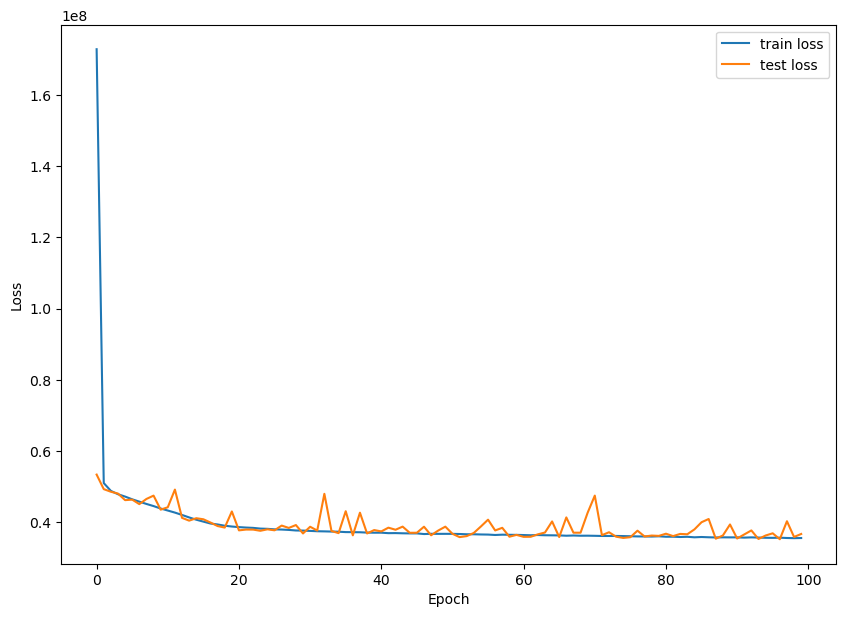

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

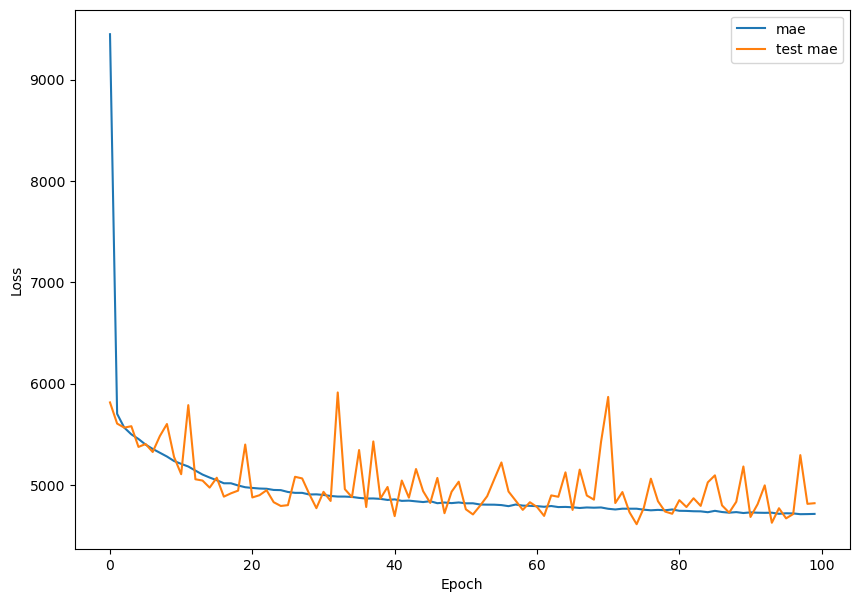

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mae')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()